<a href="https://colab.research.google.com/github/sejin-sim/Math/blob/main/7_4_%EB%8B%A4%EB%B3%80%EC%88%98_%ED%99%95%EB%A5%A0%EB%B3%80%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.  다변수 확률변수
* PMF(probability mass functio) : 확률질량함수
* PDF(probability density function) : 확률밀도함수

<br/>

### 1) 결합확률질량함수
1. 확률질량함수 $ p_X(x), p_Y(y) $ : 확률변수 각각의 확률적 특성 
> $ p_X(1) = \dfrac{1}{6}, \ldots p_X(6) = \dfrac{1}{6} $   
> $ p_Y(1) = \dfrac{1}{6}, \ldots p_Y(6) = \dfrac{1}{6} $

2. 결합확률질량함수(joint probability mass function) : 이산확률변수가 두 개 이상 있는 경우, 각각의 확률분포 뿐만 아니라 복합적인 확률분포를 살펴보는 것
> $ p_{XY}(x, y) $
> $ p_{XY}(1,1) = \dfrac{1}{36}, p_{XY}(1,2) = \dfrac{1}{36}, \ldots, p_{XY}(6,6) = \dfrac{1}{36} $





In [ ]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib as mpl
import matplotlib.font_manager as fm
import warnings

# warnings.filterwarnings(action='ignore') 

%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['axes.unicode_minus'] = False
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


ex) 결합확률질량함수
1. 50명의 학생이 X, Y 두 과목에 대해 시험을 본 결과 = A, B, C, D, E, F 학점
2. 각 열은 X과목의 학점, 각 행은 Y과목의 학점
3. 행렬의 숫자는 해당 학점 조합을 받은 학생의 수
4. 예를 들어 X과목을 B학점, Y과목을 C학점 받은 학생은 4명이다.

In [ ]:
grades = ["A", "B", "C", "D", "E", "F"]
scores = pd.DataFrame(
    [[1, 2, 1, 0, 0, 0],
     [0, 2, 3, 1, 0, 0],
     [0, 4, 7, 4, 1, 0],
     [0, 1, 4, 5, 4, 0],
     [0, 0, 1, 3, 2, 0],
     [0, 0, 0, 1, 2, 1]], 
    columns=grades, index=grades)
scores.index.name = "Y"
scores.columns.name = "X"
scores

X,A,B,C,D,E,F
Y,,,,,,
A,1,2,1,0,0,0
B,0,2,3,1,0,0
C,0,4,7,4,1,0
D,0,1,4,5,4,0
E,0,0,1,3,2,0
F,0,0,0,1,2,1


In [ ]:
# 결합확률질량함수
pmf = scores / scores.values.sum()
pmf

X,A,B,C,D,E,F
Y,,,,,,
A,0.02,0.04,0.02,0.00,0.00,0.00
B,0.00,0.04,0.06,0.02,0.00,0.00
C,0.00,0.08,0.14,0.08,0.02,0.00
D,0.00,0.02,0.08,0.10,0.08,0.00
E,0.00,0.00,0.02,0.06,0.04,0.00
F,0.00,0.00,0.00,0.02,0.04,0.02


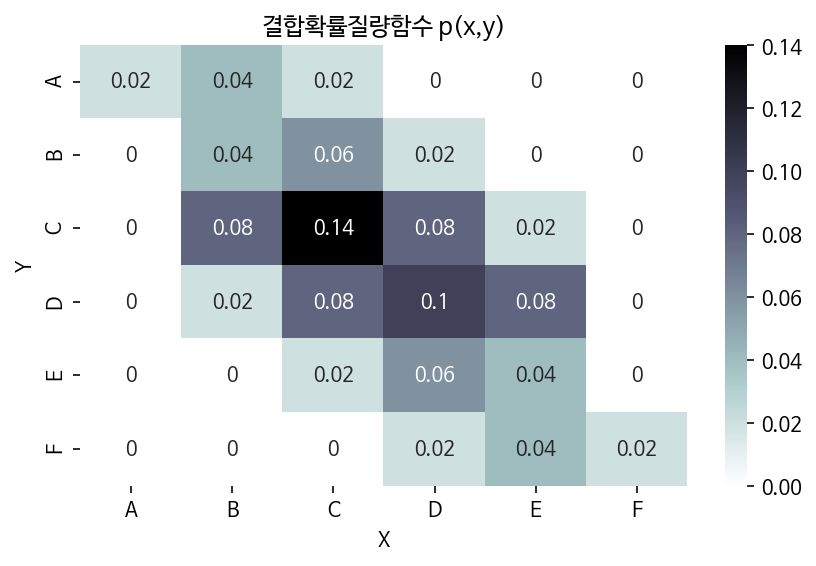

In [ ]:
sns.heatmap(pmf, cmap=mpl.cm.bone_r, annot=True,
            xticklabels=['A', 'B', 'C', 'D', 'E', 'F'],
            yticklabels=['A', 'B', 'C', 'D', 'E', 'F'])
plt.title("결합확률질량함수 p(x,y)")
plt.tight_layout()
plt.show()

### 2) 주변확률질량함수
1. 주변확률질량함수(marginal probability mass function) : 결합확률질량함수에 대해 하나의 확률변수 값에 대해서만 확률분포를 표시한 함수
2. 식
> $ p_X(x) = \sum_{y_i} p_{XY}(x,y_i) $    
> $ p_Y(y) = \sum_{x_i} p_{XY}(x_i,y) $
3. 예시
> $ \begin{aligned} 
p_X(A) 
&= p_{XY}(A,A) + p_{XY}(A,B) + p_{XY}(A,C) \\
&+  p_{XY}(A,D) + p_{XY}(A,E) + p_{XY}(A,F) \\
&= 0.02 \end{aligned}$

In [ ]:
pmf_marginal_x = pmf.sum(axis=0)
pmf_marginal_x

X
A    0.02
B    0.18
C    0.32
D    0.28
E    0.18
F    0.02
dtype: float64

In [ ]:
pmf_marginal_y = pmf.sum(axis=1)
pmf_marginal_y[:, np.newaxis]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


array([[0.08],
       [0.12],
       [0.32],
       [0.28],
       [0.12],
       [0.08]])

### 3) 조건부확률질량함수
1. 조건부확률질량함수(conditional probability mass function) : 하나의 조건하에서 확률분포를 만들어 준 것을 조건부확률질량함수라고 부를 수 있다. 다른말로 단면을 짤라서 확률을 구한 것을 조건부확률질량함수라고 부른다.
2. 식
> $ p_{X \mid Y}(x \mid y) = \dfrac{p_{XY}(x, y)}{p_{Y}(y)} $   
> $ p_{Y \mid X}(y \mid x) = \dfrac{p_{XY}(x, y)}{p_{X}(x)} $

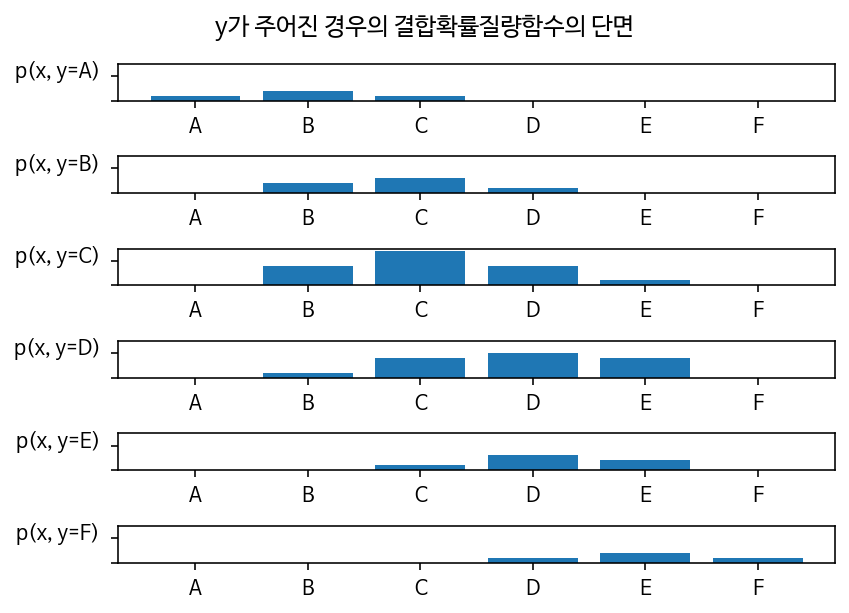

In [ ]:
import string

x = np.arange(6)
for i, y in enumerate(string.ascii_uppercase[:6]):
    ax = plt.subplot(6, 1, i + 1)
    ax.tick_params(labelleft=False)
    plt.bar(x, pmf.iloc[i, :])
    plt.ylabel("p(x, y={})".format(y), rotation=0, labelpad=30)
    plt.ylim(0, 0.15)
    plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])

plt.suptitle("y가 주어진 경우의 결합확률질량함수의 단면", y=1.05)
plt.tight_layout()
plt.show()

 $y=A$일 때의 **결합확률질량함수**의 단면과 확률의 합

In [ ]:
print(pmf.iloc[0, :])
print(np.sum(pmf.iloc[0, :]))

X
A    0.02
B    0.04
C    0.02
D    0.00
E    0.00
F    0.00
Name: A, dtype: float64
0.08


$y=A$일 때의 **조건부확률질량함수**와 확률의 합

In [ ]:
cond_y0 = pmf.iloc[0, :]/pmf_marginal_y[0]
print(cond_y0)
print(np.sum(cond_y0))

X
A    0.25
B    0.50
C    0.25
D    0.00
E    0.00
F    0.00
Name: A, dtype: float64
1.0


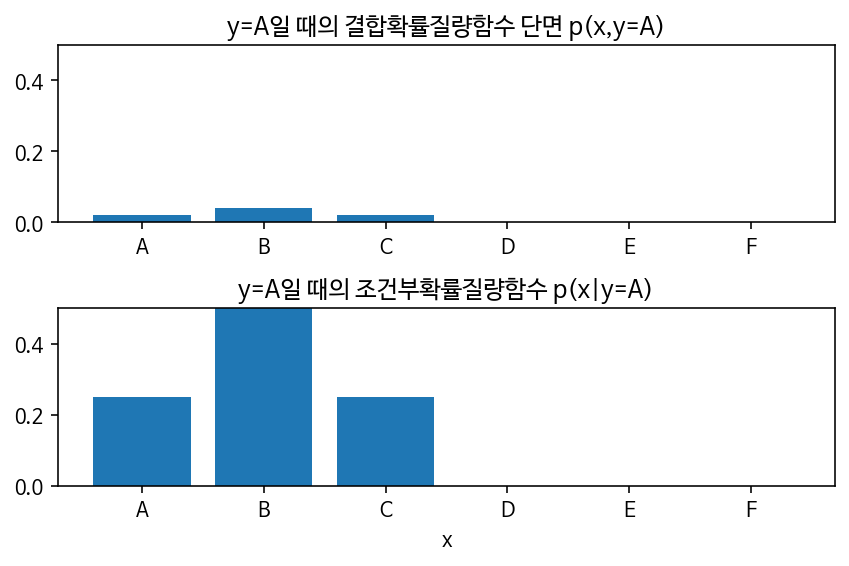

In [ ]:
plt.subplot(211)
plt.bar(x, pmf.iloc[0, :])
plt.ylim(0, 0.5)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.title("y=A일 때의 결합확률질량함수 단면 p(x,y=A)")
plt.subplot(212)
plt.bar(x, cond_y0)
plt.ylim(0, 0.5)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.title("y=A일 때의 조건부확률질량함수 p(x|y=A)")
plt.xlabel("x")
plt.tight_layout()
plt.show()

$y=B$일 때의 결합확률질량함수의 단면과 확률의 합

In [ ]:
print(pmf.iloc[1, :])
print(np.sum(pmf.iloc[1, :]))

X
A    0.00
B    0.04
C    0.06
D    0.02
E    0.00
F    0.00
Name: B, dtype: float64
0.12000000000000001


$y=B$일 때의 조건부확률질량함수와 확률의 합

In [ ]:
cond_y1 = pmf.iloc[1, :]/pmf_marginal_y[1]
print(cond_y1)
print(np.sum(cond_y1))

X
A    0.000000
B    0.333333
C    0.500000
D    0.166667
E    0.000000
F    0.000000
Name: B, dtype: float64
0.9999999999999999


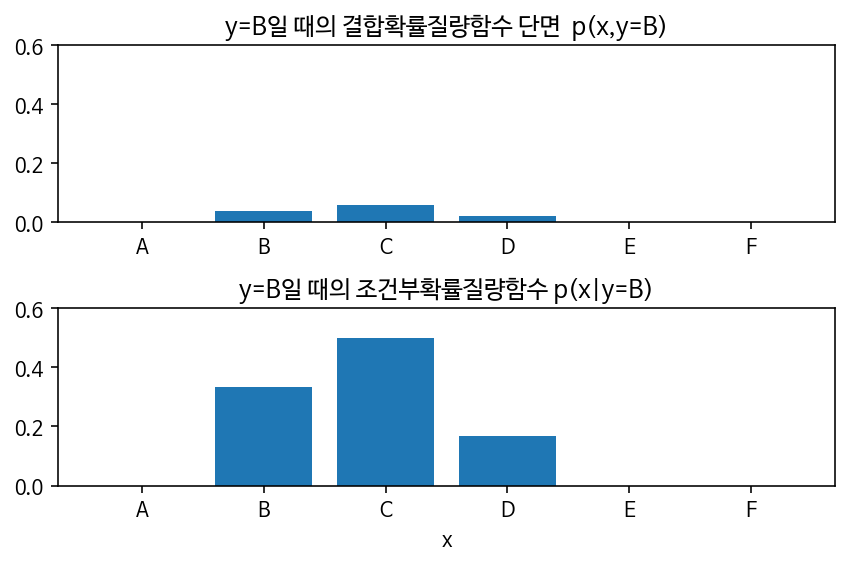

In [ ]:
y = np.arange(6)
plt.subplot(211)
plt.bar(y, pmf.iloc[1, :])
plt.ylim(0, 0.6)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.title("y=B일 때의 결합확률질량함수 단면  p(x,y=B)")
plt.subplot(212)
plt.bar(y, cond_y1)
plt.ylim(0, 0.6)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.title("y=B일 때의 조건부확률질량함수 p(x|y=B)")
plt.xlabel("x")
plt.tight_layout()
plt.show()

# 2. 다변수 연속확률변수
### 1) 결합누적확률분포함수
1. 결합누적확률분포함수 : 두 연속 확률변수 $X$, $Y$
2. 식 
> $ F_{XY}(x, y) = P(\{ X < x \} \cap \{ Y < y \}) = P(\{X < x, Y < y\}) $
3. 특성
> $ F_{XY}(\infty, \infty)=1$
> $ F_{XY}(-\infty, y)=F_{XY}(x,-\infty)=0 $


### 2) 결합확률밀도함수
1. 결합확률밀도함수(joint probability density function) : 결합누적확률분포함수를 미분하여 정의. 독립 변수가 2개이므로 각각에 대해 모두 편미분(partial differentication)해야 한다.
> $ p_{XY} = \dfrac{\partial^2 F_{XY}(x, y)}{\partial x \partial y} $
2. 결합확률밀도함수를 특정 구간에 대해 적분하면 해당 구간에 대한 확률이 된다.
> $ \int_{x_1}^{x_2} \int_{y_1}^{y_2} p_{XY}(x,y)dxdy = P\big(\{ x_1 \leq X \leq x_2, \; y_1 \leq Y \leq y_2 \}\big) $
3. 결합확률밀도함수를 모든 변수에 대해 $-\infty$에서 $\infty$ 까지 적분 = 1
> $ \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} p_{XY}(x,y)dxdy=1$
4. 연속 확률변수의 결합확률밀도함수는 2차원 함수

ex) 다변수정규분포의 결합확률밀도의 예를 그린 것이다. 어떤 집단에 대해 X는 몸무게, Y는 키를 나타내는 확률변수라고 하자.

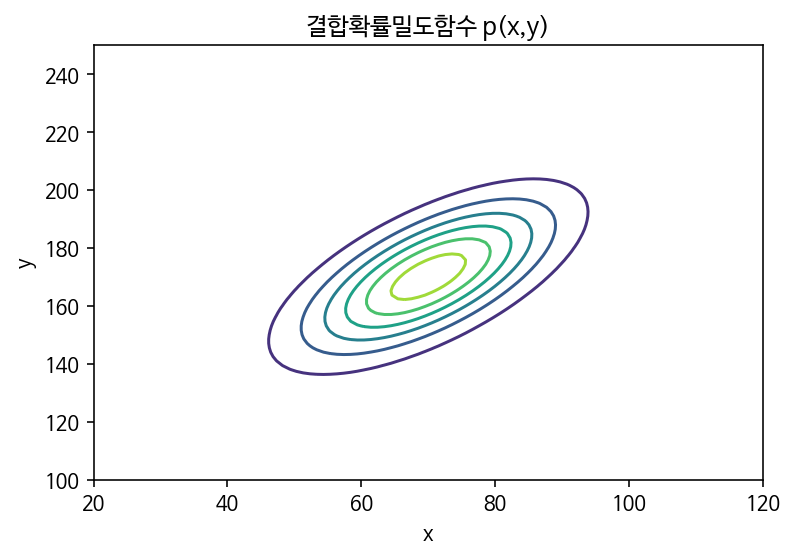

In [ ]:
mu = [70, 170]
cov = [[150, 140], [140, 300]]
rv = sp.stats.multivariate_normal(mu, cov)

xx = np.linspace(20, 120, 100)
yy = np.linspace(100, 250, 100)
XX, YY = np.meshgrid(xx, yy)
ZZ = rv.pdf(np.dstack([XX, YY]))
plt.contour(XX, YY, ZZ)
plt.xlabel("x")
plt.ylabel("y")
plt.title("결합확률밀도함수 p(x,y)")
plt.show()

### 3) 주변확률밀도함수
1. 주변확률밀도함수(marginal probability density function) : 결합확률밀도함수를 특정한 하나의 변수에 대해 가중평균한 값. 따라서 결합확률밀도함수를 하나의 확률변수에 대해서만 적분하여 구한다. 
2. 가중평균(적분)으로 인해 차원이 한 개 줄어들기 때문에 2차원 확률변수의 주변 확률 밀도 함수는 1차원 함수가 된다.
> $ p_X(x) = \int_{-\infty}^{\infty} p_{XY}(x,y)dy $   
> $ p_Y(y) = \int_{-\infty}^{\infty} p_{XY}(x,y)dx $

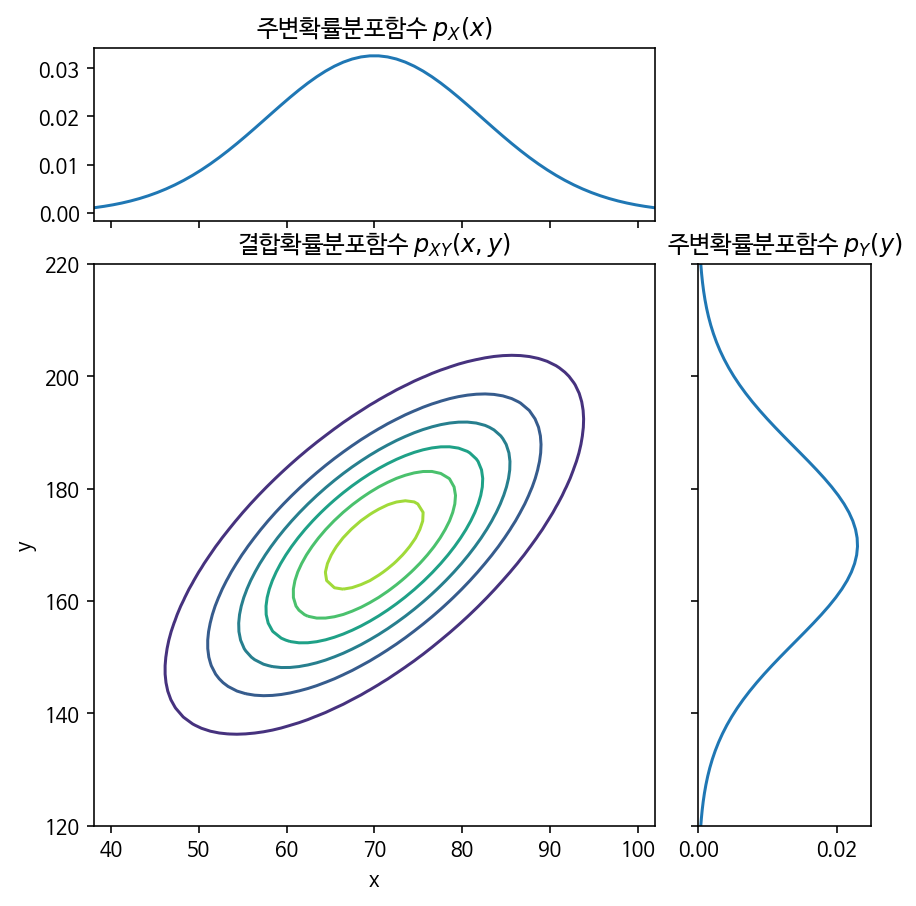

In [ ]:
from matplotlib.ticker import NullFormatter
from matplotlib import transforms
from scipy.integrate import simps  # 심슨법칙(Simpson's rule)을 사용한 적분 계산

xx = np.linspace(20, 120, 100)
yy = np.linspace(100, 250, 100)
XX, YY = np.meshgrid(xx, yy)
ZZ = rv.pdf(np.dstack([XX, YY]))
fx = [simps(Z, yy) for Z in ZZ.T]
fy = [simps(Z, xx) for Z in ZZ]

plt.figure(figsize=(6, 6))

left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.05

rect1 = [left, bottom, width, height]
rect2 = [left, bottom_h, width, 0.2]
rect3 = [left_h, bottom, 0.2, height]

ax1 = plt.axes(rect1)
ax2 = plt.axes(rect2)
ax3 = plt.axes(rect3)

ax2.xaxis.set_major_formatter(NullFormatter())
ax3.yaxis.set_major_formatter(NullFormatter())

ax1.contour(XX, YY, ZZ)
ax1.set_title("결합확률분포함수 $p_{XY}(x, y)$")
ax1.set_xlabel("x")
ax1.set_ylabel("y")

ax2.plot(xx, fx)
ax2.set_title("주변확률분포함수 $p_X(x)$")

base = ax3.transData
rot = transforms.Affine2D().rotate_deg(-90)
plt.plot(-yy, fy, transform=rot + base)
plt.title("주변확률분포함수 $p_Y(y)$")

ax1.set_xlim(38, 102)
ax1.set_ylim(120, 220)
ax2.set_xlim(38, 102)
ax3.set_xlim(0, 0.025)
ax3.set_ylim(120, 220)

plt.show()

### 4) 조건부확률밀도함수
1. 조건부확률밀도함수(conditional probability density function) : 다변수 확률변수 중 하나의 값이 특정 값이라는 사실이 알려진 경우, 이러한 조건(가정)에 의해 변화한 나머지 확률변수에 대한 확률밀도함수를 말한다. 
> $ p_{X \mid Y}(x \mid y) = \dfrac{p_{XY}(x, y)}{p_{Y}(y)}$   
> $ p_{Y \mid X}(y \mid x) = \dfrac{p_{XY}(x, y)}{p_{X}(x)}$

2. 조건부확률밀도함수에서 조건이 되는 확률변수의 값은 특정한 값으로 고정되어 있으므로 변수가 아니라 모수로 생각할 수 있다.
3. 예를 들어 $p_{X \mid Y}(x \mid y)$에서 $y$의 값은 고정되어 있으므로 이 값은 $x$의 함수가 된다.
> ex) 고정된 y값에 대해 확률 밀도 함수의 단면을 표시

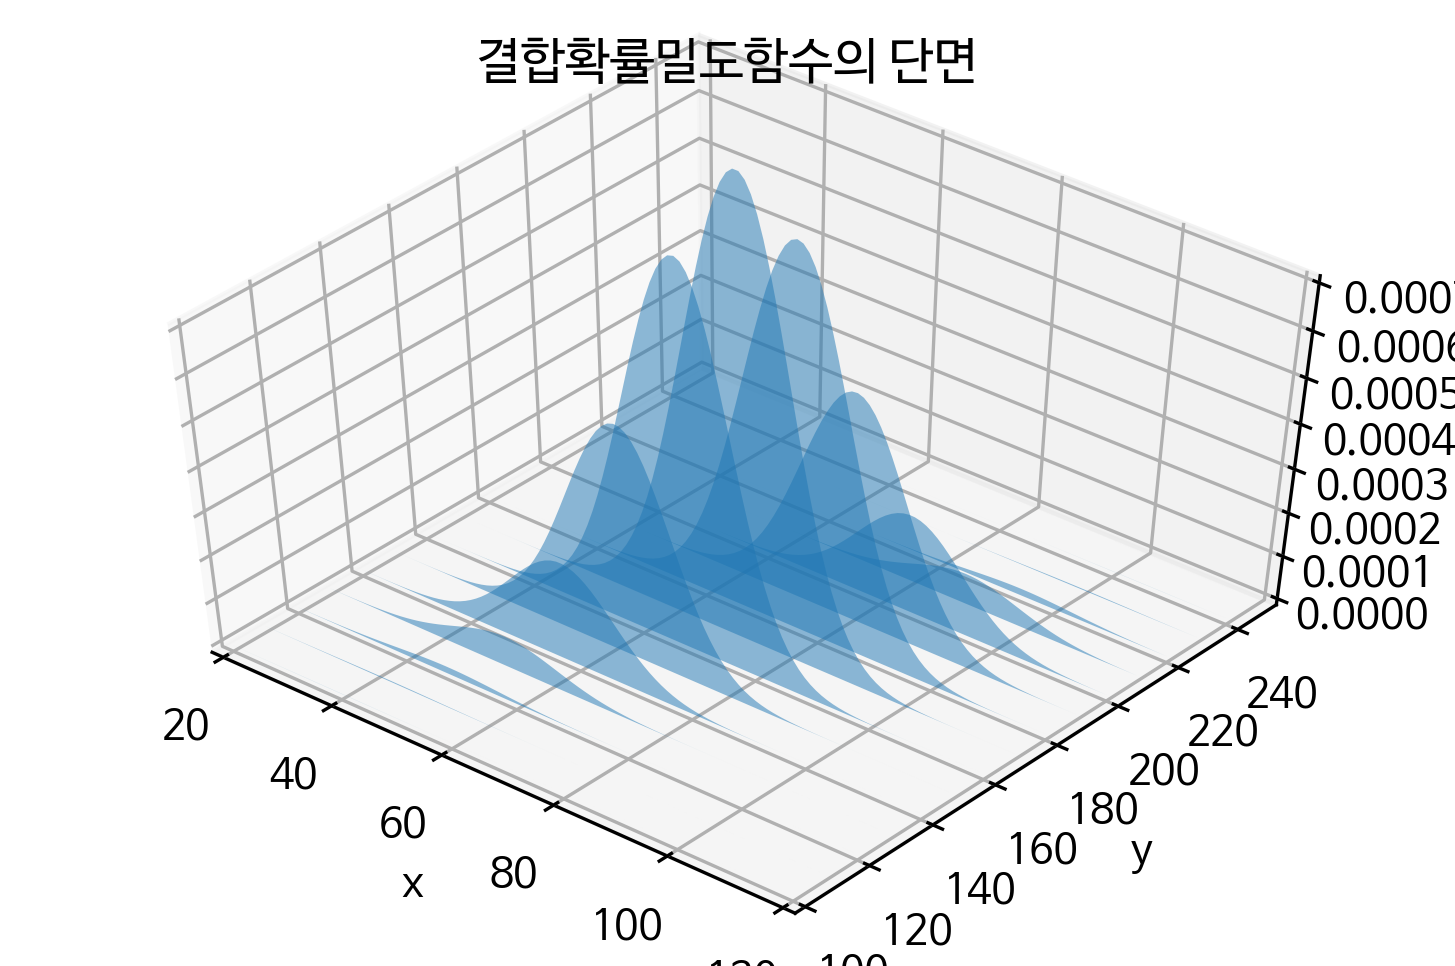

In [ ]:
from matplotlib.collections import PolyCollection
from matplotlib import colors as mcolors

xx = np.linspace(20, 120, 100)
yy = np.linspace(100, 250, 16)
XX, YY = np.meshgrid(xx, yy)
ZZ = rv.pdf(np.dstack([XX, YY]))

fig = plt.figure(dpi=150)
ax = fig.gca(projection='3d')

xs = np.hstack([0, xx, 0])
zs = np.zeros_like(xs)
verts = []
for i, y in enumerate(yy):
    zs[1:-1] = ZZ[i]
    verts.append(list(zip(xx, zs)))

poly = PolyCollection(verts)
poly.set_alpha(0.5)
ax.add_collection3d(poly, zs=yy, zdir='y')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(20, 120)
ax.set_ylim(100, 250)
ax.set_zlim3d(0, 0.0007)
ax.view_init(50, -50)
plt.title("결합확률밀도함수의 단면")
plt.show()

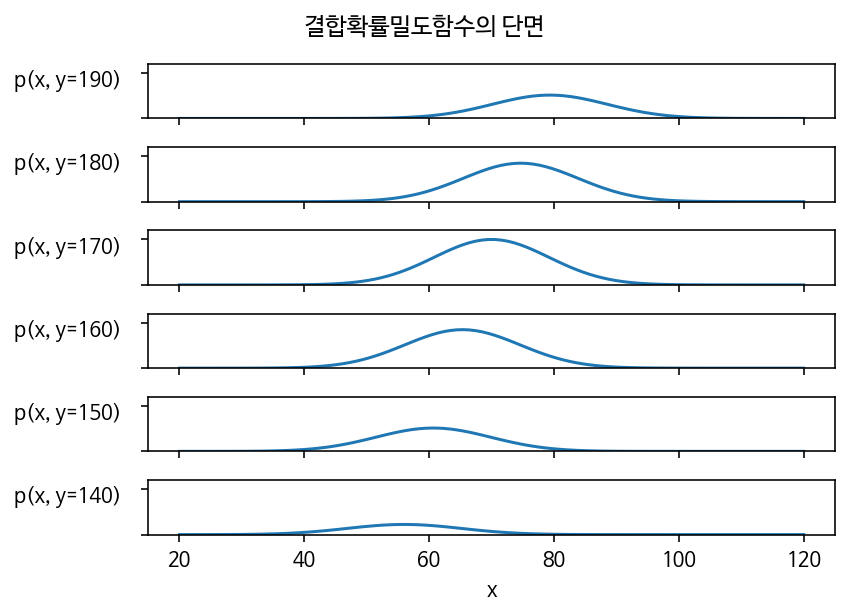

In [ ]:
for i, j in enumerate(range(9, 3, -1)):
    ax = plt.subplot(6, 1, i + 1)
    ax.tick_params(labelleft=False)
    plt.plot(xx, ZZ[j, :])
    plt.ylim(0, 0.0012)
    if i < 5:
        ax.xaxis.set_ticklabels([])
    plt.ylabel("p(x, y={:.0f})".format(yy[j]), rotation=0, labelpad=40)
plt.xlabel("x")
plt.tight_layout()
plt.suptitle("결합확률밀도함수의 단면", y=1.05)
plt.show()

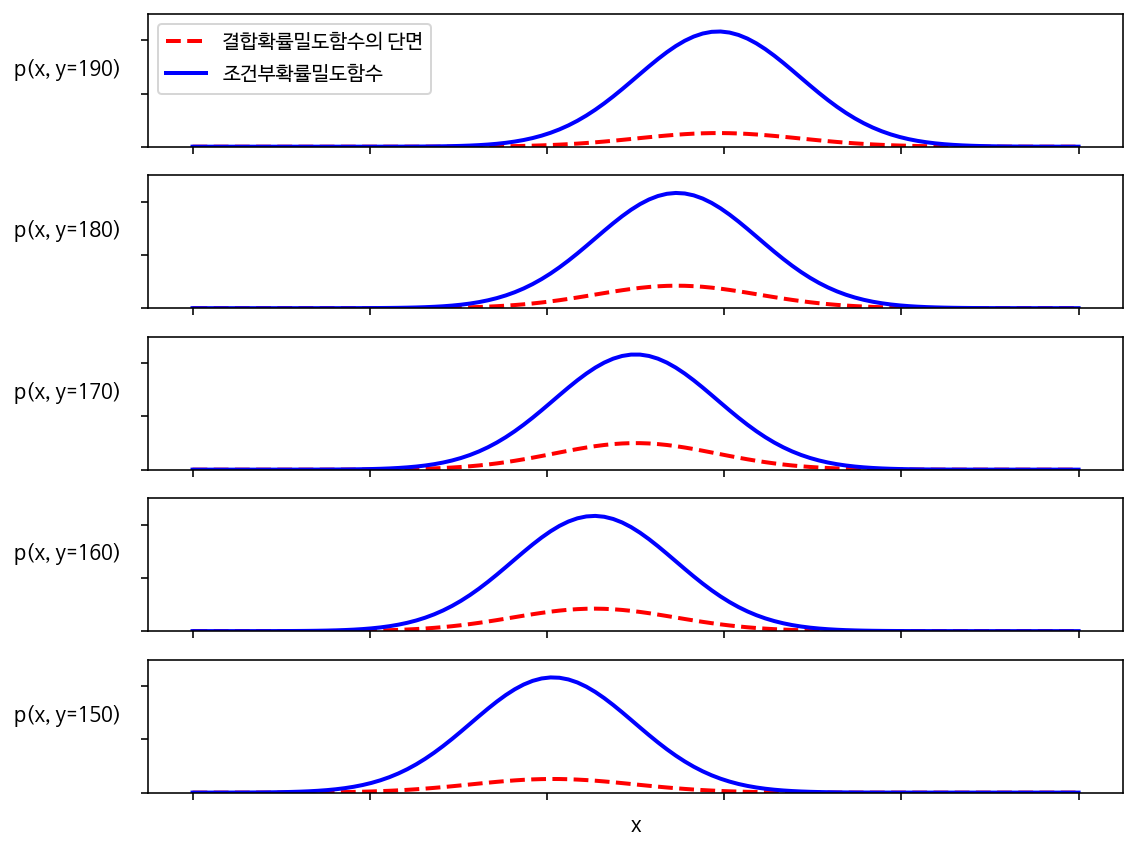

In [ ]:
from scipy.integrate import simps  # 심슨법칙(Simpson's rule)을 사용한 적분 계산

mag = 10 # 확대 비율
xx = np.linspace(20, 120, 100)
yy = np.linspace(100, 250, 16)
XX, YY = np.meshgrid(xx, yy)
ZZ = rv.pdf(np.dstack([XX, YY]))
plt.figure(figsize=(8, 6))
for i, j in enumerate(range(9, 4, -1)):
    ax = plt.subplot(5, 1, i + 1)
    ax.tick_params(labelleft=False)
    plt.plot(xx, ZZ[j, :] * mag, 'r--', lw=2, label="결합확률밀도함수의 단면")
    marginal = simps(ZZ[j, :], xx)
    plt.plot(xx, ZZ[j, :] / marginal, 'b-', lw=2, label="조건부확률밀도함수")
    plt.ylim(0, 0.05)
    ax.xaxis.set_ticklabels([])
    plt.ylabel("p(x, y={:.0f})".format(yy[j]), rotation=0, labelpad=40)
    if i == 0: 
        plt.legend(loc=2)
plt.xlabel("x")
plt.tight_layout()
plt.show()

# 3. 독립과 상관
### 1) 독립
1. 상관관계 : 두 확률변수가 있을 때, 한 확률변수의 표본 값이 달라지면 다른 확률변수의 조건부 분포가 달라질 때
2. 독립(independent) :  두 확률변수가 상관 관계가 아닐 때
> $p_{XY}(x, y) = p_X(x)p_Y(y)$
3. 두 확률변수 $X$, $Y$의 결합확률밀도함수(joint pdf)가 주변확률밀도함수(marginal pdf)의 곱과 같으면 서로 독립(independent)이다.
> $ p_{XYZ}(x, y, z) = p_X(x)p_Y(y)p_Z(z)$   
4. $X$, $Y$, $Z$ 중 어느 두 확률변수를 골라도 서로 독립이 된다.
> $ \begin{aligned}
p_{XY}(x, y) 
&= \sum_{z\in\Omega_z} p_{XY}(x, y, z) \\
&= \sum_{z\in\Omega_z}  p_X(x)p_Y(y)p_Z(z) \\
&= p_X(x)p_Y(y) \sum_{z\in\Omega_z}  p_Z(z) \\
&=p_X(x)p_Y(y) 
\end{aligned}$

<br/> 
### 2) 반복시행
1. 같은 확률변수에서 복수의 표본 데이터를 취하는 경우 : 이 표본들은 서로 독립인 확률변수들에서 나온 표본임
2. 확률밀도함수가 $f(x)$이고 표본 데이터가 $\{x_1, x_2, x_3, \cdots, x_N \}$이면 이 데이터, 즉 벡터 $(x_1, x_2, x_3, \cdots, x_N)$가 나올 확률은 다음과 같다.
> $ p(x_1, x_2, x_3, \cdots, x_N ) = \prod_{i=1}^N p(x_i)$

<br/>

### 3) 조건부 확률분포
1. 독립인 두 확률변수 $X, Y$의 조건부확률밀도함수 : 주변확률밀도함수
> $ p_{X \mid Y} (x | y) = \dfrac{p_{XY}(x, y)}{p_{Y}(y)} = \dfrac{p_{X}(x) p_{Y}(y)}{p_{Y}(y)} = p_{X}(x)$
> $ p_{Y \mid X} (y | x) = \dfrac{p_{XY}(x, y)}{p_{X}(x)} = \dfrac{p_{X}(x) p_{Y}(y)}{p_{X}(x)} = p_{Y}(y)$
2. 확률변수 $X$가 다른 확률변수 $Y$에 독립이면 조건부 확률 분포가 조건이 되는 확률변수의 값에 영향을 받지 않는다. 
> $Y$ 값이 $y_1$일 때와 $y_2$일 때의 조건부 확률 분포 $f(x \mid y_1)$과 $f(x \mid y_2)$이 $f(x)$로 같다는 의미이다. 

ex) 이산 확률변수의 결합 확률 분포


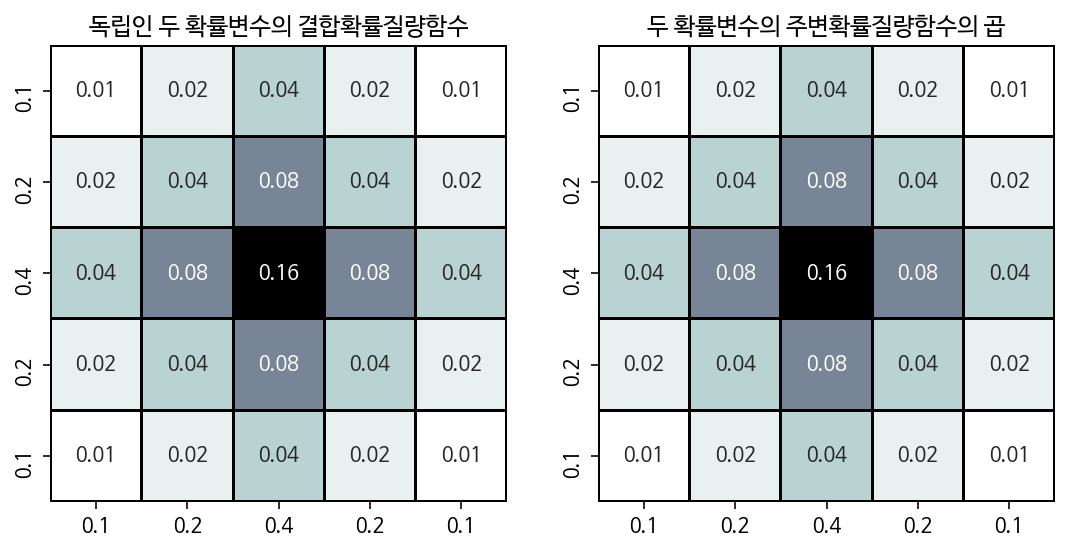

In [ ]:
# 독립
pmf1 = np.array([[1, 2,  4, 2, 1],
                 [2, 4,  8, 4, 2],
                 [4, 8, 16, 8, 4],
                 [2, 4,  8, 4, 2],
                 [1, 2,  4, 2, 1]])
pmf1 = pmf1/pmf1.sum()

pmf1_marginal_x = np.round(pmf1.sum(axis=0), 2)
pmf1_marginal_y = np.round(pmf1.sum(axis=1), 2)
pmf1x = pmf1_marginal_x * pmf1_marginal_y[:, np.newaxis]
plt.figure(figsize=(9,9))

plt.subplot(121)
sns.heatmap(pmf1, cmap=mpl.cm.bone_r, annot=True, square=True, linewidth=1, linecolor="k",
            cbar=False, xticklabels=pmf1_marginal_x, yticklabels=pmf1_marginal_y)
plt.title("독립인 두 확률변수의 결합확률질량함수")

plt.subplot(122)
pmf1x = pmf1_marginal_x * pmf1_marginal_y[:, np.newaxis]
sns.heatmap(pmf1x, cmap=mpl.cm.bone_r, annot=True, square=True, linewidth=1, linecolor="k",
            cbar=False, xticklabels=pmf1_marginal_x, yticklabels=pmf1_marginal_y)
plt.title("두 확률변수의 주변확률질량함수의 곱")



plt.show()

In [ ]:
# 여러 가지 Y값을 바꾸어도 조건부 확률은 변하지 않는다.

cond_x_y0 = pmf1[0, :]/pmf1_marginal_y[0]
print(cond_x_y0)

cond_x_y1 = pmf1[1, :]/pmf1_marginal_y[1]
print(cond_x_y1)

[0.1 0.2 0.4 0.2 0.1]
[0.1 0.2 0.4 0.2 0.1]


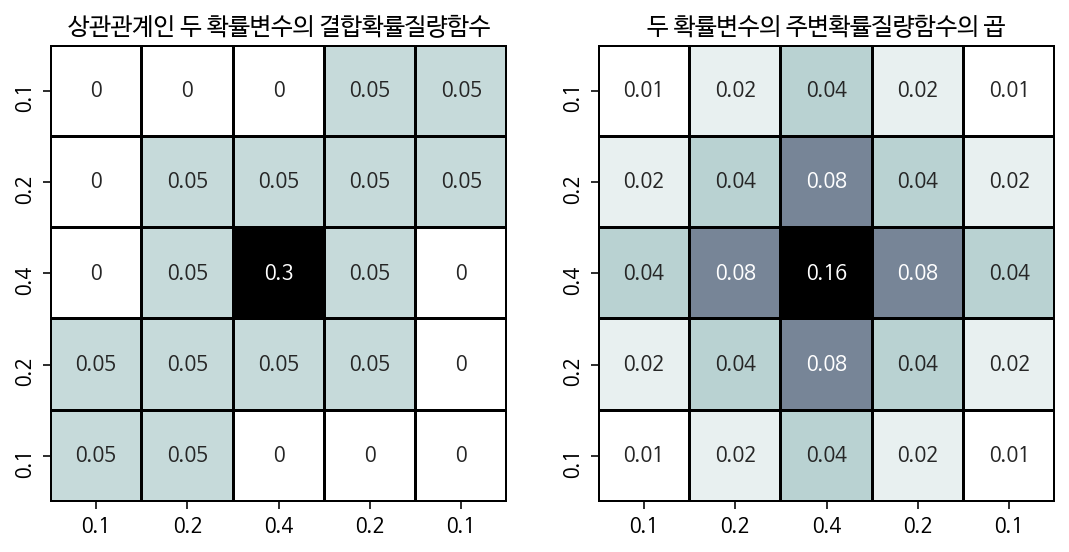

In [ ]:
# 상관관계

pmf2 = np.array([[0, 0,  0, 5, 5],
                 [0, 5,  5, 5, 5],
                 [0, 5, 30, 5, 0],
                 [5, 5,  5, 5, 0],
                 [5, 5,  0, 0, 0]])
pmf2 = pmf2/pmf2.sum()

pmf2_marginal_x = np.round(pmf2.sum(axis=0), 2)
pmf2_marginal_y = np.round(pmf2.sum(axis=1), 2)
plt.figure(figsize=(9,9))
plt.subplot(121)
sns.heatmap(pmf2, cmap=mpl.cm.bone_r, annot=True, square=True, linewidth=1, linecolor="k",
            cbar=False, xticklabels=pmf2_marginal_x, yticklabels=pmf2_marginal_y)
plt.title("상관관계인 두 확률변수의 결합확률질량함수")

plt.subplot(122)
pmf2x = pmf2_marginal_x * pmf2_marginal_y[:, np.newaxis]
sns.heatmap(pmf2x, cmap=mpl.cm.bone_r, annot=True, square=True, linewidth=1, linecolor="k",
            cbar=False, xticklabels=pmf2_marginal_x, yticklabels=pmf2_marginal_y)
plt.title("두 확률변수의 주변확률질량함수의 곱")

plt.show()

In [ ]:
# 주변 확률분포는 앞의 예와 같지만 Y의 표본 값에 따라 X의 조건부 확률분포가 달라지는 것을 확인할 수 있다.

cond_x_y0 = pmf2[0, :]/pmf2_marginal_y[0]
print(cond_x_y0)

cond_x_y1 = pmf2[1, :]/pmf2_marginal_y[1]
print(cond_x_y1)

[0.  0.  0.  0.5 0.5]
[0.   0.25 0.25 0.25 0.25]


### 4) 독립 확률변수의 기댓값
1. 독립인 두 확률변수 $X, Y$의 기댓값은 다음 성질을 만족한다. 
> $\text{E}[XY] = \text{E}[X]\text{E}[Y]$   
> $ \text{E}[(X - \mu_X)(Y-\mu_Y)] = 0$
2. 증명
> $ \begin{aligned}
\text{E}[XY] 
&= \iint xy \;p_{XY}(x, y) \; dx dy  \\
&= \iint  xy \;p_{X}(x)p_{Y}(y) \; dx dy \\
\end{aligned}
$
3. 푸비니(Fubini)의 정리 : 다중적분의 값은 적분을 연속하여 한 값과 같다
> $ \begin{aligned}
\text{E}[XY] 
&= \int \left( \int xy \;p_{X}(x)p_{Y}(y) dx \right) dy \\
&= \int \left( y\; p_{Y}(y) \left( \int x\; p_{X}(x) \; dx \right) \right) dy \\
&= \left( \int x\;p_{X}(x) \; dx \right) \left( \int y\;p_{Y}(y) \; dy \right) \\
&= \text{E}[X] \text{E}[Y] \\
\end{aligned}$
<br/>
> $ \begin{aligned}
\text{E}[(X - \mu_X)(Y-\mu_Y)] 
&= \text{E}\left[XY - \mu_XY-\mu_YX + \mu_X\mu_Y\right] \\
&= \text{E}[XY] - \mu_X\text{E}[Y]-\mu_Y\text{E}[X] + \mu_X\mu_Y  \\
&= \text{E}[XY] - \mu_X\mu_Y  \\
&= \text{E}[XY] - \text{E}[X]\text{E}[Y] = 0 
\end{aligned} $

<br/>

### 5) 독립 확률변수의 분산
1. 독립인 두 확률변수 $X, Y$의 분산은 다음 성질을 만족한다. 바로 앞 절에서 설명한 내용이므로 증명은 생략한다.
> $ \text{Var}[X+Y] = \text{Var}[X] + \text{Var}[Y]$